In [1]:
#Import Library
import json
import pandas as pd
import nltk
import re
import numpy as np
import matplotlib as plt 
import spacy 

In [59]:
business_clean1 = pd.read_pickle("C:/Users/61424/Desktop/MBusA/Module 5/Business Case Study/yelp_dataset/Business/business_clean1.pkl")
category_full_list = pd.read_json("C:/Users/61424/Desktop/MBusA/Module 5/Business Case Study/yelp_dataset/category.json")
business_full = pd.read_json("C:/Users/61424/Desktop/MBusA/Module 5/Business Case Study/yelp_dataset/business.json", lines = True)
#business_df_pickle.to_pickle('business_df')

In [3]:
business_clean1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59371 entries, 0 to 59370
Data columns (total 12 columns):
business_id       59371 non-null object
category_token    59371 non-null object
address           59371 non-null object
city              59371 non-null object
is_open           59371 non-null int64
latitude          59371 non-null float64
longitude         59371 non-null float64
name              59371 non-null object
postal_code       59371 non-null object
review_count      59371 non-null int64
stars             59371 non-null float64
state             59371 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 5.9+ MB


In [57]:
category_full_list.head(10)

,alias,country_blacklist,country_whitelist,parents,title
0,3dprinting,NaN,NaN,[localservices],3D Printing
1,abruzzese,NaN,[IT],[italian],Abruzzese
2,absinthebars,NaN,[CZ],[bars],Absinthe Bars
3,acaibowls,"[IT, AR, TR, CL, MX, PL]",NaN,[food],Acai Bowls
4,accessories,NaN,NaN,[fashion],Accessories
5,accountants,NaN,NaN,[professional],Accountants
6,acnetreatment,NaN,NaN,[beautysvc],Acne Treatment
7,active,NaN,NaN,[],Active Life
8,acupuncture,NaN,NaN,[health],Acupuncture
9,addictionmedicine,[JP],NaN,[physicians],Addiction Medicine


 Check: postal code 

In [4]:
null_postal_code = business_clean1[business_clean1['postal_code'].apply(lambda x: x == "")]

In [5]:
null_postal_code.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 282 to 59187
Data columns (total 12 columns):
business_id       102 non-null object
category_token    102 non-null object
address           102 non-null object
city              102 non-null object
is_open           102 non-null int64
latitude          102 non-null float64
longitude         102 non-null float64
name              102 non-null object
postal_code       102 non-null object
review_count      102 non-null int64
stars             102 non-null float64
state             102 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 10.4+ KB


In [6]:
#drop empty postal code as it only has 102 entries in totoal
business_clean2 = business_clean1[business_clean1['postal_code'].apply(lambda x: x != "")]

In [7]:
business_clean2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59269 entries, 0 to 59370
Data columns (total 12 columns):
business_id       59269 non-null object
category_token    59269 non-null object
address           59269 non-null object
city              59269 non-null object
is_open           59269 non-null int64
latitude          59269 non-null float64
longitude         59269 non-null float64
name              59269 non-null object
postal_code       59269 non-null object
review_count      59269 non-null int64
stars             59269 non-null float64
state             59269 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 5.9+ MB


add country

In [8]:
uk_list = ['LS6 4EP','LS27 8EB','OL2 6PX']
business_clean2['country'] = business_clean2['postal_code'].apply(lambda x: 'U.S' if re.match(r'\d{5}',x)  else ('U.K' if x in uk_list else 'Canada'))

C:\Users\61424\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [9]:
business_clean2

,business_id,category_token,address,city,is_open,latitude,longitude,name,postal_code,review_count,stars,state,country
0,QXAEGFB4oINsVuTFxEYKFQ,"[Specialty Food, Restaurants, Dim Sum, Importe...",30 Eglinton Avenue W,Mississauga,1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON,Canada
1,gnKjwL_1w79qoiV3IC_xQQ,"[Sushi Bars, Restaurants, Japanese]","10110 Johnston Rd, Ste 15",Charlotte,1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC,U.S
2,1Dfx3zM-rW4n-31KeC8sJg,"[Restaurants, Breakfast & Brunch, Mexican, Tac...",2450 E Indian School Rd,Phoenix,1,33.495194,-112.028588,Taco Bell,85016,18,3.0,AZ,U.S
3,fweCYi8FmbJXHCqLnwuk8w,"[Italian, Restaurants, Pizza, Chicken Wings]",5981 Andrews Rd,Mentor-on-the-Lake,1,41.708520,-81.359556,Marco's Pizza,44060,16,4.0,OH,U.S
4,PZ-LZzSlhSe9utkQYU8pFg,"[Restaurants, Italian]","1775 E Tropicana Ave, Ste 29",Las Vegas,0,36.100016,-115.128529,Carluccio's Tivoli Gardens,89119,40,4.0,NV,U.S
5,1RHY4K3BD22FK7Cfftn8Mg,"[Sandwiches, Salad, Restaurants, Burgers, Comf...","Center Core - Food Court, Fl 3, Pittsburgh Int...",Pittsburgh,1,40.496177,-80.246011,Marathon Diner,15231,35,4.0,PA,U.S
6,tstimHoMcYbkSC4eBA1wEg,"[Mexican, Restaurants, Patisserie/Cake Shop, F...",6055 E Lake Mead Blvd,Las Vegas,1,36.195615,-115.040529,Maria's Mexican Restaurant & Bakery,89156,184,4.5,NV,U.S
7,NDuUMJfrWk52RA-H-OtrpA,"[Juice Bars & Smoothies, Food, Restaurants, Fa...",1170 Queen Street W,Toronto,1,43.642889,-79.425429,Bolt Fresh Bar,M6J 1J5,57,3.0,ON,Canada
8,SP_YXIEwkFPPl_9anCYmpQ,"[Restaurants, Nightlife, Breakfast & Brunch, V...",1051 Bloor Street W,Toronto,0,43.660494,-79.432099,The Steady Cafe & Bar,M6H 1M4,29,3.5,ON,Canada
9,BvYU3jvGd0TJ7IyZdfiN2Q,"[Sandwiches, Italian, American (Traditional), ...",6401 Morrison Blvd,Charlotte,0,35.156338,-80.831878,Manzetti's Tavern,28211,16,3.5,NC,U.S


#Continue dealing with category

In [10]:
def get_bag_of_words (document):
    
    bag_of_words = {}
    
    #store the frequency of words:
    for line in document:
        for word in line:
            
            if word in bag_of_words:
                bag_of_words[word] +=1
            else:
                bag_of_words[word] = 1
                
    
    
    return bag_of_words

In [11]:
def sort_freq(mydict):
    sorted_dict = sorted(mydict.items(), key=lambda kv: kv[1], reverse=True)
    return sorted_dict

In [49]:
#Check Word co-occurence frequency:

def get_word_co_occurence(document,this_matrix):
    
    
    for line in document:
        stop_position = len(line)-1
    
        for word in line:
            this_position = line.index(word)
            
            if this_position < stop_position:
                next_position = this_position + 1
                next_word = line[next_position]
                
                
                #add 1 to the corresponding matrix cell:
                #Ignore the order
                
                this_matrix.loc[word,next_word] += 1
                
                this_matrix.loc[next_word,word] += 1
                

    return this_matrix  



In [13]:
#Check Word co-occurence binary (0 or 1):

def get_word_co_occurence_b(document,this_matrix):
    
    
    for line in document:
        stop_position = len(line)-1
    
        for word in line:
            this_position = line.index(word)
            
            if this_position < stop_position:
                next_position = this_position + 1
                next_word = line[next_position]
                
                
                #add 1 to the corresponding matrix cell:
                #Ignore the order
                
                this_matrix.loc[word,next_word] = 1
                
                this_matrix.loc[next_word,word] = 1
                

    return this_matrix  



In [14]:
#Check sorted bag of words
token_bag = sort_freq(get_bag_of_words(business_clean2['category_token']))
print(len(token_bag))
token_bag

760


[('Restaurants', 59269),
 ('Food', 14744),
 ('Nightlife', 8559),
 ('Bars', 8179),
 ('Sandwiches', 7321),
 ('Fast Food', 7250),
 ('American (Traditional)', 7102),
 ('Pizza', 6800),
 ('Burgers', 5399),
 ('Breakfast & Brunch', 5374),
 ('American (New)', 4877),
 ('Italian', 4714),
 ('Mexican', 4611),
 ('Chinese', 4426),
 ('Coffee & Tea', 3644),
 ('Cafes', 3227),
 ('Japanese', 2715),
 ('Chicken Wings', 2704),
 ('Event Planning & Services', 2679),
 ('Salad', 2528),
 ('Seafood', 2507),
 ('Sushi Bars', 2258),
 ('Specialty Food', 2086),
 ('Delis', 1953),
 ('Asian Fusion', 1951),
 ('Canadian (New)', 1904),
 ('Mediterranean', 1831),
 ('Bakeries', 1830),
 ('Caterers', 1823),
 ('Barbeque', 1813),
 ('Sports Bars', 1811),
 ('Desserts', 1721),
 ('Steakhouses', 1602),
 ('Pubs', 1491),
 ('Indian', 1486),
 ('Thai', 1446),
 ('Diners', 1433),
 ('Middle Eastern', 1314),
 ('Vietnamese', 1286),
 ('Beer', 1135),
 ('Wine & Spirits', 1135),
 ('Vegetarian', 1123),
 ('Greek', 1084),
 ('Arts & Entertainment', 1035)

In [15]:
# get more category characteristics
#convert token_bag to a dictionary:
token_bag_dict = {}
for element in token_bag:
    this_key = element[0]
    token_bag_dict[this_key] = element[1]

In [18]:
#It would be hard to define the market segment for record only contain "Resteraunts" or "Food" or empty
#print(len(business_chara[business_chara['niche_market_extent'].apply(lambda x: x ==0)]))
print(len(business_clean2[business_clean2['category_token'].apply(lambda x: x == ['Restaurants'])]))
print(len(business_clean2[business_clean2['category_token'].apply(lambda x: x == ['Food'])]))

business_clean3 = business_clean2[business_clean2['category_token'].apply(lambda x: x != ['Restaurants'])]
business_clean3 = business_clean3[business_clean3['category_token'].apply(lambda x: x != ['Food'])]
business_clean3 = business_clean3[business_clean3['category_token'].apply(lambda x: x != ['Food', 'Restaurants'])]
business_clean3 = business_clean3[business_clean3['category_token'].apply(lambda x: x != ['Restaurants','Food'])]
print(len(business_clean3))

255
0
59010


,business_id,category_token,address,city,is_open,latitude,longitude,name,postal_code,review_count,stars,state,country
15394,QkTnoDfl7-cLQEAW9TqMQQ,"[Restaurants, Food]",3923 E Thomas Rd,Phoenix,0,33.479889,-111.997771,On The Grill,85018,4,4.0,AZ,U.S
54342,vnQ9a0e_DuS4MC9nyEbA5A,"[Restaurants, Food]",3400 Paradise Rd,Las Vegas,0,36.127224,-115.153991,E Go Cafe,89169,4,3.0,NV,U.S


In [19]:
business_clean3

,business_id,category_token,address,city,is_open,latitude,longitude,name,postal_code,review_count,stars,state,country
0,QXAEGFB4oINsVuTFxEYKFQ,"[Specialty Food, Restaurants, Dim Sum, Importe...",30 Eglinton Avenue W,Mississauga,1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON,Canada
1,gnKjwL_1w79qoiV3IC_xQQ,"[Sushi Bars, Restaurants, Japanese]","10110 Johnston Rd, Ste 15",Charlotte,1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC,U.S
2,1Dfx3zM-rW4n-31KeC8sJg,"[Restaurants, Breakfast & Brunch, Mexican, Tac...",2450 E Indian School Rd,Phoenix,1,33.495194,-112.028588,Taco Bell,85016,18,3.0,AZ,U.S
3,fweCYi8FmbJXHCqLnwuk8w,"[Italian, Restaurants, Pizza, Chicken Wings]",5981 Andrews Rd,Mentor-on-the-Lake,1,41.708520,-81.359556,Marco's Pizza,44060,16,4.0,OH,U.S
4,PZ-LZzSlhSe9utkQYU8pFg,"[Restaurants, Italian]","1775 E Tropicana Ave, Ste 29",Las Vegas,0,36.100016,-115.128529,Carluccio's Tivoli Gardens,89119,40,4.0,NV,U.S
5,1RHY4K3BD22FK7Cfftn8Mg,"[Sandwiches, Salad, Restaurants, Burgers, Comf...","Center Core - Food Court, Fl 3, Pittsburgh Int...",Pittsburgh,1,40.496177,-80.246011,Marathon Diner,15231,35,4.0,PA,U.S
6,tstimHoMcYbkSC4eBA1wEg,"[Mexican, Restaurants, Patisserie/Cake Shop, F...",6055 E Lake Mead Blvd,Las Vegas,1,36.195615,-115.040529,Maria's Mexican Restaurant & Bakery,89156,184,4.5,NV,U.S
7,NDuUMJfrWk52RA-H-OtrpA,"[Juice Bars & Smoothies, Food, Restaurants, Fa...",1170 Queen Street W,Toronto,1,43.642889,-79.425429,Bolt Fresh Bar,M6J 1J5,57,3.0,ON,Canada
8,SP_YXIEwkFPPl_9anCYmpQ,"[Restaurants, Nightlife, Breakfast & Brunch, V...",1051 Bloor Street W,Toronto,0,43.660494,-79.432099,The Steady Cafe & Bar,M6H 1M4,29,3.5,ON,Canada
9,BvYU3jvGd0TJ7IyZdfiN2Q,"[Sandwiches, Italian, American (Traditional), ...",6401 Morrison Blvd,Charlotte,0,35.156338,-80.831878,Manzetti's Tavern,28211,16,3.5,NC,U.S


 Define a new feature: niche market extent
#How common is the market this resteraunt operate in?

In [20]:
business_chara = pd.DataFrame(business_clean3.loc[:,['business_id','category_token']])
business_chara['niche_market_extent'] = 0

In [21]:
niche_list = []
for i in range(0, len(business_chara)):
    this_cat = business_chara.iloc[i,1]
    this_niche = 0
    exclude_list = ['Restaurants','Food']
    
    for element in this_cat:
        if element not in exclude_list:
            this_niche += token_bag_dict[element]
    
    niche_list.append(this_niche)

In [24]:
business_chara['niche_market_extent'] = niche_list

In [25]:
# find the most unique word in this category token
# will use this feature to exlude ir-relevant record
unique_list = []
for i in range(0, len(business_chara)):
    this_cat = business_chara.iloc[i,1]
    this_min = token_bag_dict[this_cat[0]]
    exclude_list = ['Restaurants','Food']
    this_unique = ''
    
    for element in this_cat:
        if element not in exclude_list:
            this_weight = token_bag_dict[element]
            if this_weight <= this_min:
                this_min = this_weight
                this_unique = element
    
    unique_list.append(this_unique)

In [26]:
# find the minimal weight in this category token
# will use this feature to exlude ir-relevant record
min_list = []
for i in range(0, len(business_chara)):
    this_cat = business_chara.iloc[i,1]
    this_min = token_bag_dict[this_cat[0]]
    exclude_list = ['Restaurants','Food']
    
    for element in this_cat:
        if element not in exclude_list:
            this_min = min(this_min,token_bag_dict[element])
    
    min_list.append(this_min)

In [27]:
# find the most common word in this category token
# will use this feature to exlude ir-relevant record
common_list = []
for i in range(0, len(business_chara)):
    exclude_list = {'Restaurants','Food'}
    this_cat = list(set(business_chara.iloc[i,1]) - exclude_list)
    
    
    this_max = token_bag_dict[this_cat[0]]    
    this_common = ''
    
    for element in this_cat:
        this_weight = token_bag_dict[element]
        if this_weight >= this_max:
            
            this_max = this_weight
            this_common = element
    
    common_list.append(this_common)

business_id                de2ezuGAKPYjHA8pYNnd6g
category_token                [Food, Restaurants]
address           Bay Adelaide Centre, 333 Bay St
city                                      Toronto
is_open                                         1
latitude                                  43.6503
longitude                                -79.3805
name                                 Extreme Pita
postal_code                               M5H 2S8
review_count                                    3
stars                                           2
state                                          ON
country                                    Canada
Name: 13349, dtype: object

['Japanese', 'Sushi Bars']

In [28]:
business_chara['category_count'] = business_chara['category_token'].apply(lambda x: len(x))
business_chara['niche_market_extent_avg'] = business_chara['niche_market_extent']/ business_chara['category_count']
business_chara['min_weight'] = min_list 
business_chara['most_unique'] = unique_list
business_chara['most_common'] = common_list


In [30]:
business_chara


count    59269.000000
mean      2418.465573
std       1366.464873
min          0.000000
25%       1264.250000
50%       2305.500000
75%       3426.000000
max       6232.200000
Name: niche_market_extent_avg, dtype: float64
66.5


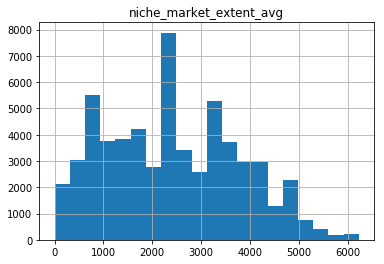

In [129]:
business_chara.hist(column = ['niche_market_extent_avg'],bins=20)
print(business_chara['niche_market_extent_avg'].describe())
target_quantile = np.quantile(business_chara['niche_market_extent_avg'],0.01)
print(target_quantile)

count    59269.000000
mean      2466.409286
std       4330.268259
min          1.000000
25%        479.000000
50%       1446.000000
75%       4426.000000
max      59269.000000
Name: min_weight, dtype: float64
7.0


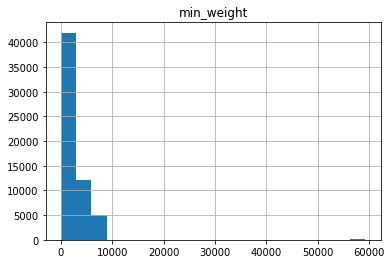

In [143]:
business_chara.hist(column = ['min_weight'],bins=20)
print(business_chara['min_weight'].describe())
target_quantile = np.quantile(business_chara['min_weight'],0.01)
print(target_quantile)

 Try to run a clustering

In [31]:
import matplotlib.pyplot as plt 
import pandas as pd 
import nltk
import numpy as np
import re
from nltk.stem import WordNetLemmatizer
import math
import spacy
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis.sklearn

In [32]:
#Tackel with tfidf Vectorizer:
def dummy_fun(doc):
    return doc

In [33]:
# Try to get TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_0 = TfidfVectorizer(
    analyzer='word',
    tokenizer=dummy_fun,
    preprocessor=dummy_fun,
    token_pattern=None) 

In [34]:
train_sample_tfidf_0 = tfidf_0.fit_transform(business_chara['category_token'])    

In [38]:
lda_category = LatentDirichletAllocation(n_topics=20, max_iter=5, learning_method='online',verbose=True)
category_lda = lda_category.fit_transform(train_sample_tfidf_0 )

C:\Users\61424\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


iteration: 1 of max_iter: 5
iteration: 2 of max_iter: 5
iteration: 3 of max_iter: 5
iteration: 4 of max_iter: 5
iteration: 5 of max_iter: 5


In [36]:
# Functions for printing keywords for each topic
def selected_topics(model, vectorizer, top_n=30):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-top_n - 1:-1]]) 

In [39]:
pyLDAvis.enable_notebook()

dash0 = pyLDAvis.sklearn.prepare(lda_category, train_sample_tfidf_0, tfidf_0, mds='tsne')
dash0

C:\Users\61424\AppData\Local\Continuum\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
2       42.000271  164.133011       1        1  10.101321
7      -29.827726 -111.486015       2        1   9.734893
0       39.407433  -40.326160       3        1   7.601690
14     111.822662  -34.701477       4        1   6.327237
13    -190.883942  -16.460310       5        1   5.029492
11     -91.455139  -86.970314       6        1   4.869447
16     -21.393713  -49.457073       7        1   4.732864
19     -70.775780   89.492424       8        1   4.634915
4       -0.680707   58.409374       9        1   4.496049
6     -137.263000  -51.693169      10        1   4.461494
12     -55.265720    2.758501      11        1   4.452373
17      73.686737 -111.690750      12        1   4.311253
1       18.840008 -166.790192      13        1   4.201960
18    -197.116287   60.796982      14        1   3.900702
10     249.137848 -195.165100      15        1   3.739482
15     -60.093525 -228.841400      16        1   3.720290
8       65.709114   32.389870      17        1   3.643043
5      -69.596664 -163.056641      18        1   3.598959
9     -118.657181   28.625034      19        1   3.461763
3     -148.182983 -164.123337      20        1   2.980771, topic_info=    Category         Freq                       Term        Total  loglift  \
22   Default  3364.000000     American (Traditional)  3364.000000  30.0000   
257  Default  3449.000000                  Fast Food  3449.000000  29.0000   
112  Default  3081.000000                    Burgers  3081.000000  28.0000   
593  Default  3415.000000                 Sandwiches  3415.000000  27.0000   
64   Default  1693.000000                   Barbeque  1693.000000  26.0000   
535  Default  3198.000000                      Pizza  3198.000000  25.0000   
148  Default  1780.000000              Chicken Wings  1780.000000  24.0000   
21   Default  2354.000000             American (New)  2354.000000  23.0000   
103  Default  2442.000000         Breakfast & Brunch  2442.000000  22.0000   
598  Default  1545.000000                    Seafood  1545.000000  21.0000   
66   Default  2354.000000                       Bars  2354.000000  20.0000   
125  Default  1324.000000             Canadian (New)  1324.000000  19.0000   
474  Default  2430.000000                  Nightlife  2430.000000  18.0000   
657  Default  1344.000000                 Sushi Bars  1344.000000  17.0000   
726  Default  1217.000000                 Vietnamese  1217.000000  16.0000   
149  Default  2271.000000                    Chinese  2271.000000  15.0000   
382  Default  1575.000000                   Japanese  1575.000000  14.0000   
380  Default  2244.000000                    Italian  2244.000000  13.0000   
446  Default  2486.000000                    Mexican  2486.000000  12.0000   
368  Default  1182.000000                     Indian  1182.000000  11.0000   
591  Default  1301.000000                      Salad  1301.000000  10.0000   
248  Default  1194.000000  Event Planning & Services  1194.000000   9.0000   
45   Default  1136.000000               Asian Fusion  1136.000000   8.0000   
163  Default  1543.000000               Coffee & Tea  1543.000000   7.0000   
119  Default  1421.000000                      Cafes  1421.000000   6.0000   
206  Default  1216.000000                      Delis  1216.000000   5.0000   
141  Default   973.000000                   Caterers   973.000000   4.0000   
684  Default   983.000000                       Thai   983.000000   3.0000   
212  Default   943.000000                     Diners   943.000000   2.0000   
447  Default   807.000000             Middle Eastern   807.000000   1.0000   
..       ...          ...                        ...          ...      ...   
649  Topic20   204.583414             Street Vendors   205.593618   3.5081   
541  Topic20    89.353086                     Polish    90.363290   3.5017   
589  Topic20    63.086813    

In [48]:
business_chara[business_chara['category_token'].apply(lambda x: 'Health Markets' in x)]

,business_id,category_token,niche_market_extent,category_count,niche_market_extent_avg,min_weight,most_unique,most_common
1259,x6aWnNa8fyakUb5QaOdTIQ,"[Organic Stores, Juice Bars & Smoothies, Vegan...",11101,10,1110.100000,72,Organic Stores,Coffee & Tea
1415,BAjbkzPVqPsIPOmioaPgQg,"[Shopping, Health Markets, Gluten-Free, Local ...",7081,11,643.727273,2,Cannabis Dispensaries,Specialty Food
2109,EJfVxSKNFqlsTKFC-lpeRw,"[Food Trucks, Vegetarian, Restaurants, Food, H...",3941,6,656.833333,163,Health Markets,Specialty Food
2350,7B0qcp3pQw-zoGNySmYRqw,"[Vegan, Arts & Entertainment, Food, Music Venu...",21537,10,2153.700000,163,Health Markets,Nightlife
2472,uKWh_n81PJY7XTjPQib_yw,"[Gluten-Free, Juice Bars & Smoothies, Vegetari...",24660,11,2241.818182,163,Health Markets,Sandwiches
3482,4mYNxIZan0vuTqZ9BS7__w,"[Juice Bars & Smoothies, Restaurants, Food, He...",3156,5,631.200000,163,Health Markets,Specialty Food
4042,IeXVSmtOx0-kntCM_ZX0Zw,"[Salad, Specialty Food, Restaurants, Food, Bur...",10176,6,1696.000000,163,Health Markets,Burgers
4053,9kmczPRen9Ig8qbd9Tm1lw,"[Restaurants, American (Traditional), Grocery,...",14110,9,1567.777778,163,Health Markets,American (Traditional)
4471,Jz4LZvTibMEzXx8nZX5Q7g,"[Health Markets, Grocery, Restaurants, Sandwic...",10155,6,1692.500000,163,Health Markets,Sandwiches
4763,DiqeZX986KShhjI7f-uP1Q,"[Specialty Food, Restaurants, Food Delivery Se...",10301,6,1716.833333,163,Health Markets,Sandwiches


Redefine Dataset Subset: find the parent list 

In [61]:
business_category = business_full[['business_id','categories']]

business_title = \
business_category.set_index(business_category.columns.drop('categories').tolist())\
.categories.str.split(', ',expand=True)\
.stack()\
.reset_index()\
.rename(columns={0:'categories'})\
.loc[:,business_category.columns]

business_title.columns = ['business_id', 'title']


In [64]:
business_main = pd.merge(business_title,category_full_list,on='title',how='left' )

In [66]:
business_main.parents = business_main.parents.str[0]
business_main['parents'] = np.where(business_main.parents.isnull(), business_main.alias, business_main.parents )


In [74]:
#sum(business_main['parents'].isna())
business_parent = business_main.loc[:,['business_id','parents']]
resteraunt_list = business_chara['business_id']

resteraunt_list = pd.merge(business_parent,resteraunt_list, on = 'business_id', how = 'inner')

In [85]:
resteraunt_list[resteraunt_list['parents'] != ('restaurants' or 'food')]['parents'].unique()

array(['food', 'chinese', nan, 'mexican', 'nightlife', 'bars',
       'publicservicesgovt', 'eventservices', 'health', 'localflavor',
       'japanese', 'beautysvc', 'shopping', 'arts', 'flowers',
       'mideastern', 'caribbean', 'auto', 'media', 'gourmet', 'active',
       'fashion', 'localservices', 'fitness', 'breweries', 'latin',
       'hotelstravel', 'mediterranean', 'artsandcrafts', 'homeandgarden',
       'african', 'education', 'specialtyschools', 'travelservices',
       'wineries', 'adultentertainment', 'professional', 'tours',
       'homeservices', 'cafes', 'pets', 'tastingclasses', 'realestate',
       'dentists', 'religiousorgs', 'transport', 'laundryservices',
       'italian', 'physicians', 'hairremoval', 'hair', 'othersalons',
       'c_and_mh', 'psychic_astrology', 'financialservices',
       'partyequipmentrentals', 'petservices', 'petstore', 'itservices',
       'tanning', 'pet_sitting', 'lawyers', 'photographers', 'portuguese',
       'wholesalers', 'nonprofit', 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 788359 entries, 0 to 788358
Data columns (total 2 columns):
business_id    788359 non-null object
parents        775395 non-null object
dtypes: object(2)
memory usage: 18.0+ MB


In [98]:
non_target_category = ['publicservicesgovt', 
        'beautysvc', 'arts', 'flowers',
        'auto', 'media', 
       'fashion', 'localservices', 'fitness', 'breweries', 'latin',
       'hotelstravel', 'mediterranean', 'artsandcrafts', 'homeandgarden',
       'education', 'specialtyschools', 'travelservices',
       'wineries', 'adultentertainment', 'professional', 'tours',
       'homeservices', 'pets', 'tastingclasses', 'realestate',
       'dentists', 'religiousorgs', 'transport', 'laundryservices',
       'physicians', 'hairremoval', 'hair', 'othersalons',
       'c_and_mh', 'psychic_astrology', 'financialservices',
       'partyequipmentrentals', 'petservices', 'petstore', 'itservices',
       'tanning', 'pet_sitting', 'lawyers', 'photographers', 'wholesalers', 'nonprofit', 'sportgoods', 'french', 'autoglass',
       'insurance', 'museums', 'farms', 'airports', 'martialarts',
       'massmedia', 'hotels', 'diagnosticservices']

In [108]:
a = resteraunt_list[resteraunt_list['parents'].apply(lambda x: x in non_target_category)]

b = a.merge(business_chara, 'left')
non_target_id = pd.DataFrame(b['business_id'])
non_target_id_list = list(non_target_id['business_id'].unique())

In [149]:
#exclude non_target_id
business_chara2 = business_chara[business_chara['business_id'].apply(lambda x: x not in non_target_id_list)]
business_chara2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56742 entries, 0 to 59370
Data columns (total 8 columns):
business_id                56742 non-null object
category_token             56742 non-null object
niche_market_extent        56742 non-null int64
category_count             56742 non-null int64
niche_market_extent_avg    56742 non-null float64
min_weight                 56742 non-null int64
most_unique                56742 non-null object
most_common                56742 non-null object
dtypes: float64(1), int64(3), object(4)
memory usage: 3.9+ MB


In [116]:
resteraunt_parent = resteraunt_list[resteraunt_list['parents'].apply(lambda x: x != 'restaurants')]
resteraunt_parent = resteraunt_parent[resteraunt_parent['parents'].apply(lambda x: x != 'food')]

In [137]:
parent_dict = {}
for i in range(1,len(resteraunt_parent)):
    
    this_id = resteraunt_parent.iloc[i,0]
    
    this_parents = resteraunt_parent.iloc[i,1]
    
    parent_dict[this_id] = this_parents

In [155]:
# add category parent
business_chara2['category_parent'] = 'resteraunts & food'
business_chara2['category_parent']= business_chara2['business_id'].map(parent_dict)



C:\Users\61424\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\61424\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [181]:
business_chara2['category_parent'] = business_chara2['category_parent'].apply(lambda x: str(x))
business_chara2.loc[business_chara2.category_parent == 'nan', 'category_parent'] = business_chara2.most_common
business_chara2['category_parent'] = business_chara2['category_parent'].apply(lambda x: x.lower())

C:\Users\61424\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\61424\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [183]:
business_chara2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56742 entries, 0 to 59370
Data columns (total 9 columns):
business_id                56742 non-null object
category_token             56742 non-null object
niche_market_extent        56742 non-null int64
category_count             56742 non-null int64
niche_market_extent_avg    56742 non-null float64
min_weight                 56742 non-null int64
most_unique                56742 non-null object
most_common                56742 non-null object
category_parent            56742 non-null object
dtypes: float64(1), int64(3), object(5)
memory usage: 6.8+ MB


In [189]:
h = pd.DataFrame(business_chara2.loc[:,['business_id','category_parent']])
business_clean4 = business_clean3.merge(h,'inner')

In [190]:
business_clean4

,business_id,category_token,address,city,is_open,latitude,longitude,name,postal_code,review_count,stars,state,country,category_parent
0,QXAEGFB4oINsVuTFxEYKFQ,"[Specialty Food, Restaurants, Dim Sum, Importe...",30 Eglinton Avenue W,Mississauga,1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON,Canada,chinese
1,gnKjwL_1w79qoiV3IC_xQQ,"[Sushi Bars, Restaurants, Japanese]","10110 Johnston Rd, Ste 15",Charlotte,1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC,U.S,japanese
2,1Dfx3zM-rW4n-31KeC8sJg,"[Restaurants, Breakfast & Brunch, Mexican, Tac...",2450 E Indian School Rd,Phoenix,1,33.495194,-112.028588,Taco Bell,85016,18,3.0,AZ,U.S,mexican
3,fweCYi8FmbJXHCqLnwuk8w,"[Italian, Restaurants, Pizza, Chicken Wings]",5981 Andrews Rd,Mentor-on-the-Lake,1,41.708520,-81.359556,Marco's Pizza,44060,16,4.0,OH,U.S,pizza
4,PZ-LZzSlhSe9utkQYU8pFg,"[Restaurants, Italian]","1775 E Tropicana Ave, Ste 29",Las Vegas,0,36.100016,-115.128529,Carluccio's Tivoli Gardens,89119,40,4.0,NV,U.S,italian
5,1RHY4K3BD22FK7Cfftn8Mg,"[Sandwiches, Salad, Restaurants, Burgers, Comf...","Center Core - Food Court, Fl 3, Pittsburgh Int...",Pittsburgh,1,40.496177,-80.246011,Marathon Diner,15231,35,4.0,PA,U.S,sandwiches
6,tstimHoMcYbkSC4eBA1wEg,"[Mexican, Restaurants, Patisserie/Cake Shop, F...",6055 E Lake Mead Blvd,Las Vegas,1,36.195615,-115.040529,Maria's Mexican Restaurant & Bakery,89156,184,4.5,NV,U.S,nightlife
7,NDuUMJfrWk52RA-H-OtrpA,"[Juice Bars & Smoothies, Food, Restaurants, Fa...",1170 Queen Street W,Toronto,1,43.642889,-79.425429,Bolt Fresh Bar,M6J 1J5,57,3.0,ON,Canada,fast food
8,SP_YXIEwkFPPl_9anCYmpQ,"[Restaurants, Nightlife, Breakfast & Brunch, V...",1051 Bloor Street W,Toronto,0,43.660494,-79.432099,The Steady Cafe & Bar,M6H 1M4,29,3.5,ON,Canada,nightlife
9,BvYU3jvGd0TJ7IyZdfiN2Q,"[Sandwiches, Italian, American (Traditional), ...",6401 Morrison Blvd,Charlotte,0,35.156338,-80.831878,Manzetti's Tavern,28211,16,3.5,NC,U.S,sandwiches


#Data Export

In [191]:
business_clean4.to_csv("C:/Users/61424/Desktop/MBusA/Module 5/Business Case Study/yelp_dataset/Business/business_clean4.csv")
business_clean4.to_pickle("C:/Users/61424/Desktop/MBusA/Module 5/Business Case Study/yelp_dataset/Business/business_clean4.pkl")
#business_df_pickle.to_pickle('business_df')
business_chara2.to_pickle("C:/Users/61424/Desktop/MBusA/Module 5/Business Case Study/yelp_dataset/Business/business_chara2.pkl")
business_chara2.to_csv("C:/Users/61424/Desktop/MBusA/Module 5/Business Case Study/yelp_dataset/Business/business_chara2.csv")